<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/Stock_Market_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
def fetch_financial_data(company):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

pzu = fetch_financial_data('PZU.PL')
pkn = fetch_financial_data('PKN.PL')
ge = fetch_financial_data('GE')
co = fetch_financial_data('KO')

In [3]:
pzu.columns = ['pzu_' + col.lower() for col in pzu.columns]
pkn.columns = ['pkn_' + col.lower() for col in pkn.columns]
ge.columns = ['ge_' + col.lower() for col in ge.columns]
co.columns = ['co_' + col.lower() for col in co.columns]

In [4]:
data_all = pd.concat(objs=[pkn, pzu, ge, co], axis=1)
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-10-23,54.256,55.549,53.565,55.205,1259513.0,29.449,29.592,29.194,29.346,2751054.0,26.674,26.791,26.420,26.501,85590930.0,36.768,36.768,36.295,36.327,22139327.0
2015-10-26,54.903,56.584,54.687,55.843,1298356.0,29.127,29.644,29.025,29.604,2078481.0,26.509,26.636,26.411,26.538,54290988.0,36.303,36.413,36.049,36.158,17418997.0
2015-10-27,55.626,56.378,55.256,55.964,766215.0,29.644,30.015,29.381,29.936,1719800.0,26.411,26.617,26.253,26.458,75278982.0,36.082,36.309,36.067,36.178,35532465.0
2015-10-28,55.730,55.964,54.403,55.153,2773637.0,29.753,29.945,29.678,29.945,1500261.0,26.340,26.566,26.180,26.392,79144255.0,36.295,36.371,35.838,36.278,16098360.0
2015-10-29,54.989,54.998,54.169,54.437,1009269.0,29.831,29.839,29.151,29.252,1298929.0,26.198,26.382,26.100,26.348,47183011.0,36.216,36.421,35.946,36.327,11104173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-14,44.000,44.060,42.820,43.300,1779708.0,24.400,24.500,23.860,24.060,2957028.0,6.720,6.890,6.720,6.820,98076229.0,50.050,50.490,49.650,50.120,10582935.0
2020-10-15,42.800,42.950,40.760,40.800,1573861.0,24.010,24.050,22.900,22.930,2540522.0,6.700,6.880,6.610,6.870,89252691.0,49.400,50.130,49.300,49.990,9963190.0
2020-10-16,40.820,42.450,40.020,42.100,1213883.0,22.910,23.150,22.340,22.990,2238979.0,6.960,7.350,6.935,7.290,169147263.0,49.990,50.350,49.870,50.030,13570887.0


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
pkn_open,1246.0,8.007004e+01,1.912327e+01,4.082000e+01,6.000175e+01,8.362600e+01,9.635525e+01,1.229200e+02
pkn_high,1246.0,8.116589e+01,1.932908e+01,4.245000e+01,6.065500e+01,8.459150e+01,9.772775e+01,1.229200e+02
pkn_low,1246.0,7.887649e+01,1.894189e+01,4.002000e+01,5.911950e+01,8.246900e+01,9.527350e+01,1.208600e+02
pkn_close,1246.0,8.000321e+01,1.915662e+01,4.080000e+01,5.984675e+01,8.351200e+01,9.641250e+01,1.225000e+02
pkn_volume,1246.0,1.066253e+06,6.453184e+05,1.828340e+05,6.492488e+05,9.177275e+05,1.283904e+06,7.733447e+06
pzu_open,1246.0,3.345322e+01,6.153143e+00,2.071700e+01,2.805500e+01,3.626700e+01,3.861400e+01,4.224600e+01
pzu_high,1246.0,3.381056e+01,6.189467e+00,2.079300e+01,2.832950e+01,3.677500e+01,3.894375e+01,4.242300e+01
pzu_low,1246.0,3.303837e+01,6.133458e+00,2.050000e+01,2.758800e+01,3.588250e+01,3.820150e+01,4.177200e+01
pzu_close,1246.0,3.342018e+01,6.161721e+00,2.064900e+01,2.805500e+01,3.626650e+01,3.858575e+01,4.222800e+01
pzu_volume,1246.0,2.145377e+06,1.366725e+06,3.627720e+05,1.304294e+06,1.834276e+06,2.562600e+06,1.472682e+07


In [6]:
data_all.columns

Index(['pkn_open', 'pkn_high', 'pkn_low', 'pkn_close', 'pkn_volume',
       'pzu_open', 'pzu_high', 'pzu_low', 'pzu_close', 'pzu_volume', 'ge_open',
       'ge_high', 'ge_low', 'ge_close', 'ge_volume', 'co_open', 'co_high',
       'co_low', 'co_close', 'co_volume'],
      dtype='object')

In [7]:
data_close = [col for col in data_all.columns if col.endswith('close')]
data_close

['pkn_close', 'pzu_close', 'ge_close', 'co_close']

In [8]:
x = data_all[data_close] # dane - cena zamkniecia 
x.head(10)

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-10-23,55.205,29.346,26.501,36.327
2015-10-26,55.843,29.604,26.538,36.158
2015-10-27,55.964,29.936,26.458,36.178
2015-10-28,55.153,29.945,26.392,36.278
2015-10-29,54.437,29.252,26.348,36.327
2015-10-30,54.143,29.390,25.972,35.956
2015-11-02,54.773,29.526,26.401,35.862
2015-11-03,54.343,29.449,26.576,35.792
2015-11-04,55.032,29.558,26.528,35.634


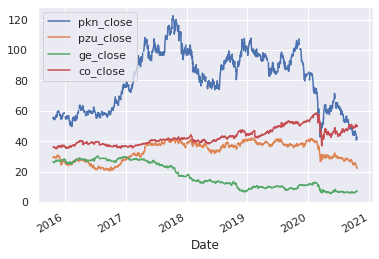

In [9]:
_ = x.plot()

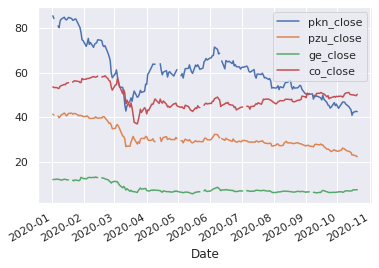

In [12]:
x_2020 = x['2020-01-01' : ] #dane od początku 2020 roku
_ = x_2020.plot()